# 1. Import libraries

In [1]:
# This are the libraries needed in this jupyter:
import numpy as np 
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# 2. Import data.

In [2]:
data = pd.read_csv("../data/continent_smart.csv",encoding = "utf-8",na_filter = False)

# 3. Display Configuration

In [3]:
# Matplotlib inline to visualize Matplotlib grahps:
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [4]:
data

,City,Country,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index,Continent,Life_Quality
0,oslo,Norway,6480,6512,7516,4565,8618,9090,7138,Europe,64.31459459459458
1,bergen,Norway,7097,6876,7350,4905,8050,9090,7296,Europe,60.09445945945945
2,amsterdam,Netherlands,7540,5558,8528,8095,7098,7280,7311,Europe,69.59878378378377
3,copenhagen,Denmark,7490,7920,8726,5580,5780,7200,7171,Europe,68.81594594594596
4,stockholm,Sweden,6122,7692,8354,4330,6743,7730,6812,Europe,64.99675675675675
...,...,...,...,...,...,...,...,...,...,...,...
97,riga,Latvia,4152,4584,4616,7380,3745,4330,4712,Europe,58.917027027027025
98,beijing,China,7610,2998,2806,4905,5183,1980,4449,Asia,53.410270270270274
99,st petersburg,Russia,4588,2908,3622,4515,5390,4100,4191,Europe,
100,calgary,Canada,6675,4052,5946,8022,6424,8657,6678,North America,65.5031081081081


# 4. Graphs

## 4.2 Frequency of each continent

In [5]:
data.Continent.unique()

array(['Europe', 'North America', 'Asia', 'Oceania'], dtype=object)

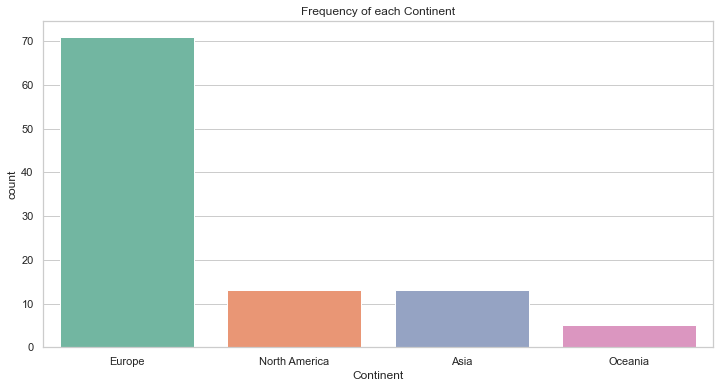

In [6]:
sns.countplot(x=data['Continent'], palette="Set2")
plt.title('Frequency of each Continent')
plt.show()

## 4.1 Frequency of each country

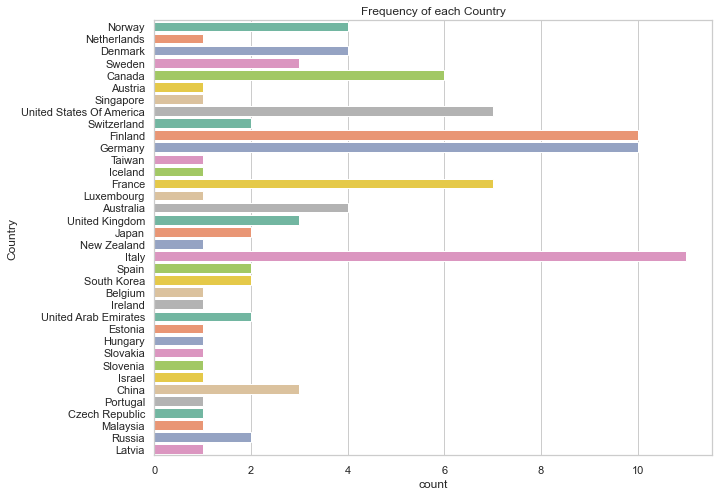

In [7]:
plt.figure(figsize=(10,8))
sns.countplot(y=data['Country'], palette="Set2")
plt.title('Frequency of each Country')
plt.savefig
plt.show()

In [8]:
data.groupby(["Continent", "Country"])["Country"].count()

Continent      Country                 
Asia           China                        3
               Israel                       1
               Japan                        2
               Malaysia                     1
               Singapore                    1
               South Korea                  2
               Taiwan                       1
               United Arab Emirates         2
Europe         Austria                      1
               Belgium                      1
               Czech Republic               1
               Denmark                      4
               Estonia                      1
               Finland                     10
               France                       7
               Germany                     10
               Hungary                      1
               Iceland                      1
               Ireland                      1
               Italy                       11
               Latvia                   

Text(0.5, 1.0, 'Frequency of each Country per Continent')

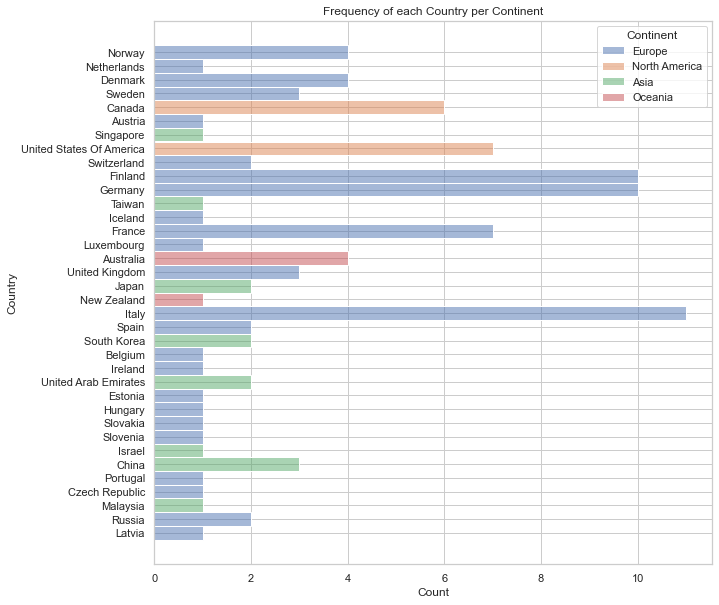

In [9]:
plt.figure(figsize=(10,10))
sns.histplot(data=data, y="Country", hue="Continent")
plt.title('Frequency of each Country per Continent')

## 4.3 Top 10 Cities in each category

In [10]:
def getTop10Cities():
    fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12,20));
    axs = axs.flatten()
    category = ["Smart_Mobility","Smart_Environment","Smart_Government","Smart_Economy","Smart_People","Smart_Living"]
    for i in range(0,6):
        var = category[i]
        top10 = data[['City',category[i]]].sort_values(by=category[i], ascending=False).head(10)
        sns.barplot(data=top10, x = var, y="City", ax=axs[i], palette="Set2")
        plt.title(f'Top 10 cities in {var}')
    plt.savefig(f'{var}.png')


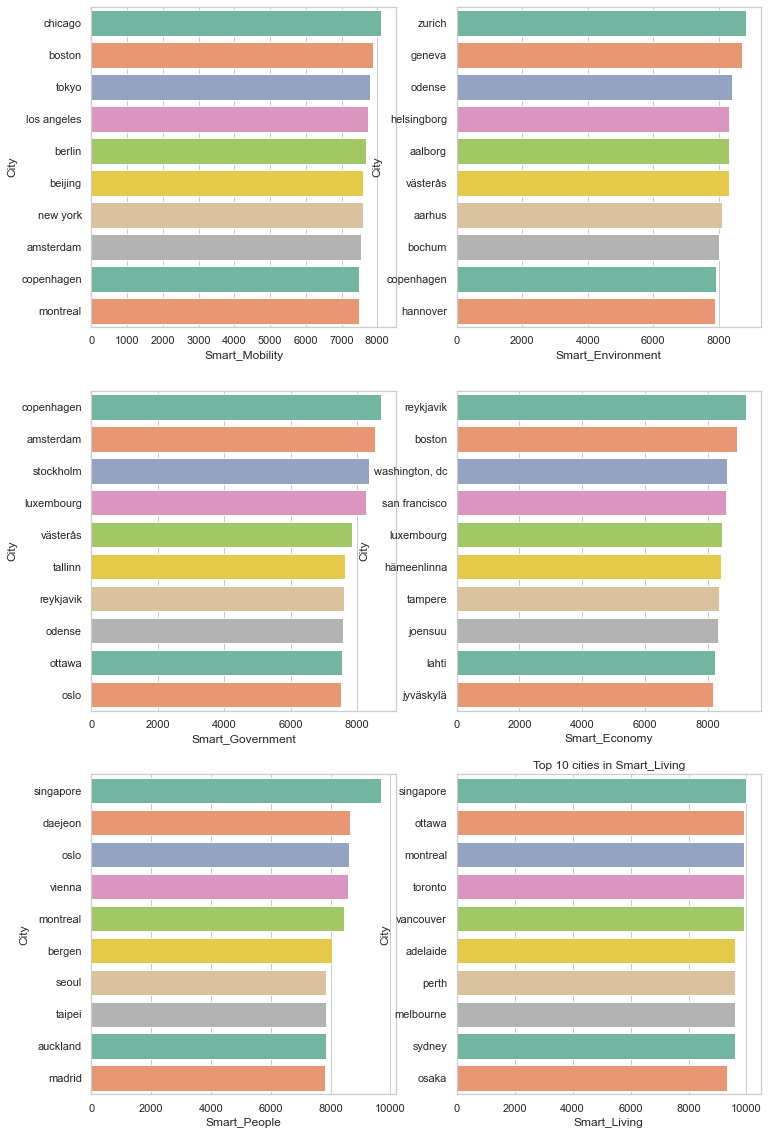

In [11]:
getTop10Cities()

## 4.4 Worst 10 Cities in each category

In [12]:
def getWorst10Cities():
    fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12,20));
    axs = axs.flatten()
    category = ["Smart_Mobility","Smart_Environment","Smart_Government","Smart_Economy","Smart_People","Smart_Living"]
    for i in range(0,6):
        var = category[i]
        top10 = data[['City',category[i]]].sort_values(by=category[i], ascending=True).head(10)
        sns.barplot(data=top10, x = var, y="City", ax=axs[i], palette="Set2")
        plt.title(f'Top 10 cities in {var}')
    plt.savefig(f'{var}.png')


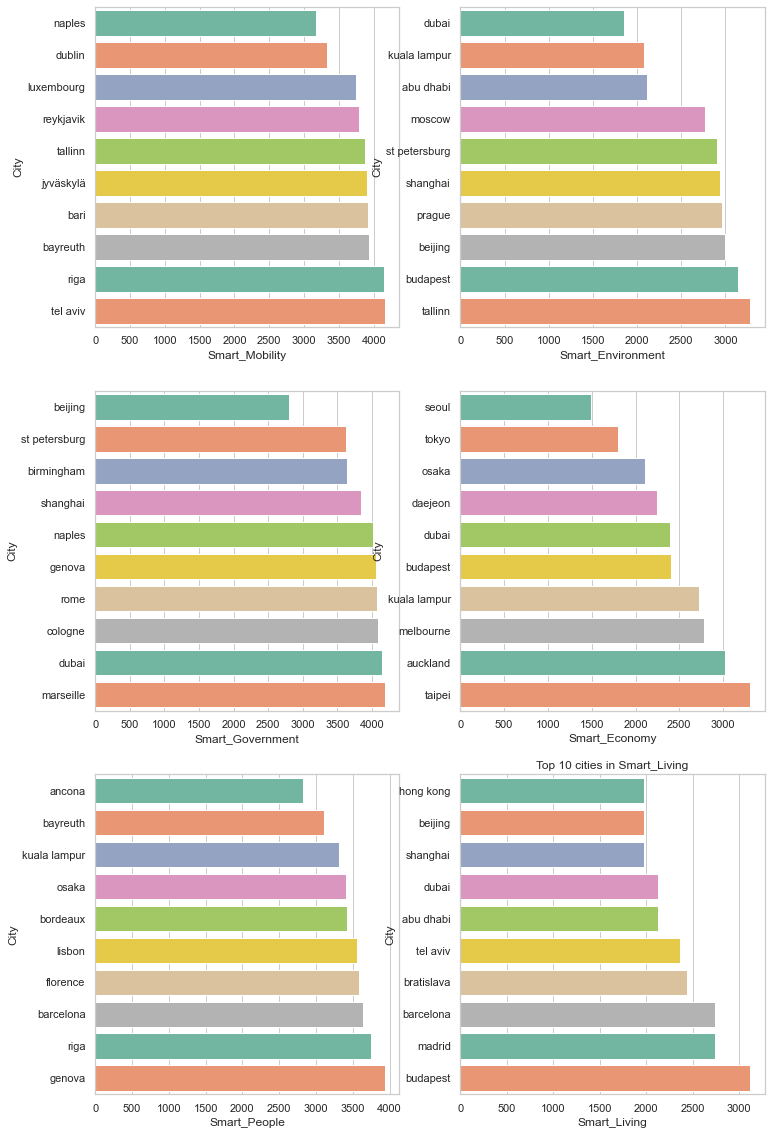

In [13]:
getWorst10Cities()

## 4.5 Overall Top 10 Smart City Index

In [14]:
def overal_getTop10Cities():
    top10 = data[['City','SmartCity_Index']].sort_values(by="SmartCity_Index", ascending=False).head(10)
    sns.barplot(data=top10, x = "SmartCity_Index", y ="City", palette="Set2")
    plt.title ("Top 10 Overal SmartCity_Index")

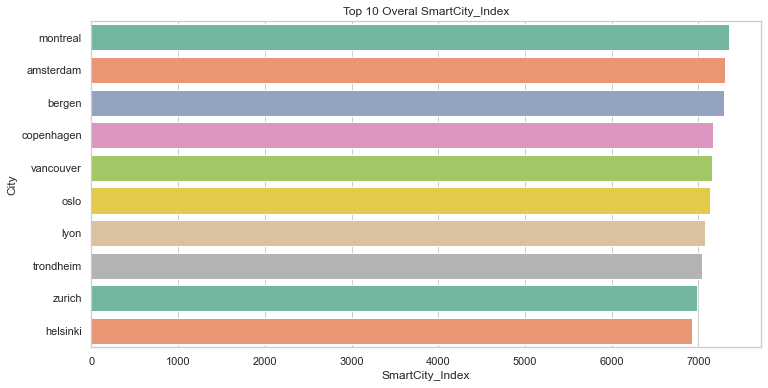

In [15]:
overal_getTop10Cities()

## 4.6 Overall Worst 10 Smart City Index

In [16]:
def overal_getWorst10Cities():
    top10 = data[['City','SmartCity_Index']].sort_values(by="SmartCity_Index", ascending=True).head(10)
    sns.barplot(data=top10, x = "SmartCity_Index", y ="City", palette="Set2")
    plt.title ("Top 10 Overal SmartCity_Index")

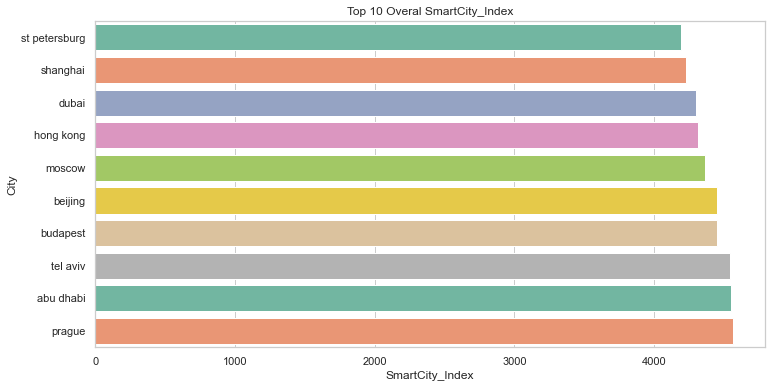

In [17]:
overal_getWorst10Cities()

## 4.5 Life Quality

In [18]:
total = data.loc[data["City"].isin(["montreal","amsterdam", "bergen", "copenhagen", "vancouver", "prague", "abu dhabi", "tel aviv", "budapest", "beijiin"])]

<AxesSubplot:xlabel='City', ylabel='SmartCity_Index'>

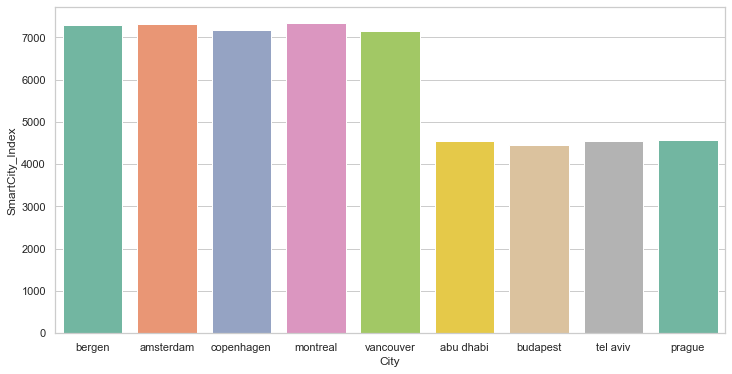

In [19]:
sns.barplot(data=total, y = "SmartCity_Index", x ="City", palette="Set2")